In [98]:
from datetime import datetime
from pathlib import Path
root = Path().cwd()

import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import coordinate_utils as cu
import vec_transform as vt
import trend_utils as tu

import pickle

In [99]:
#Domains
norcal_domain = [-124.65, -117.25, 35.35, 42.5]
synoptic_domain = [-150, -90, 20, 60]

In [100]:
with open(root/'clusters.pkl', 'rb') as f:
    clusters = pickle.load(f)

In [101]:
clusters['k'][0].keys()

dict_keys(['center', 'full', 'n_cases', 'times', 'frp'])

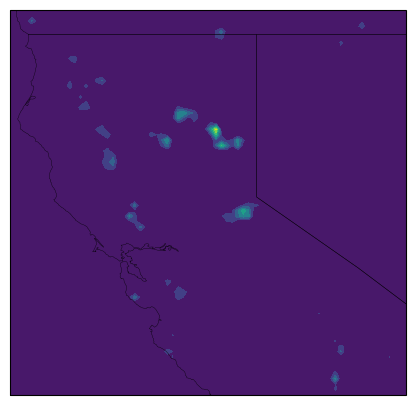

In [102]:
lonlon_frp, latlat_frp = np.meshgrid(clusters["coords"]['lon_frp'], clusters["coords"]['lat_frp'])
fig = plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lonlon_frp, latlat_frp, np.sum(clusters["k"][0]["frp"], axis=0), transform=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces', scale='10m'), linewidth=0.25, facecolor='none', edgecolor='black', zorder=2)

KeyError: "not all values found in index 'valid_time'. Try setting the `method` keyword argument (example: method='nearest')."

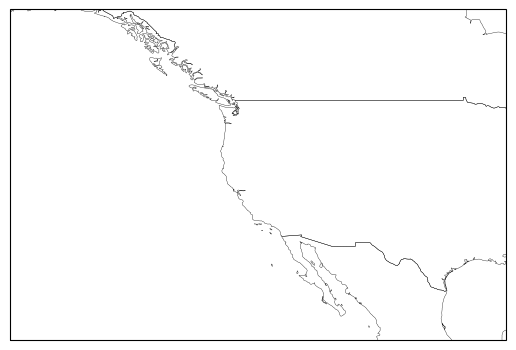

In [103]:
k=2
time = cu.ts_to_dt('2008-06-23')

z500min = 530
z500max = 580

mslpmin = 1000
mslpmax = 1030

lonlon_syn, latlat_syn = np.meshgrid(clusters["coords"]["lon_syn"], clusters["coords"]["lat_syn"],)

fields = clusters["k"][k]["full"]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axis('scaled')
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m'), linewidth=0.25, facecolor='none', edgecolor='black', zorder=2)
ax.set_extent(synoptic_domain, crs=ccrs.PlateCarree())

hgt_cont = ax.contourf(lonlon_syn, latlat_syn, fields.sel(valid_time=time)['z']/100, range(z500min, z500max+1, 2), extend='both')
cb = fig.colorbar(hgt_cont, ticks = range(z500min, z500max+1, 10), extend='both')
cb.update_ticks()
cb.set_label("Geopotential Height (dam)")

mslp_cont = ax.contour(lonlon_syn, latlat_syn, fields.sel(valid_time=time)['msl']/100, range(mslpmin, mslpmax+1, 5), linewidths=1, colors='black')
ax.clabel(mslp_cont, range(mslpmin, mslpmax+1, 5), inline=True, fmt = lambda x: f"{round(x)} hPa", fontsize=8)

gl_interval = 10
gl = ax.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl.xlocator = plt.MultipleLocator(gl_interval)
gl.ylocator = plt.MultipleLocator(gl_interval)
gl.right_labels=False
gl.top_labels=False
gl.rotate_labels=False

In [105]:
clusters["k"][1]["times"]

<xarray.DataArray 'valid_time' (valid_time: 15)>
array(['2003-10-25T00:00:00.000000000', '2004-10-13T00:00:00.000000000',
       '2007-09-09T00:00:00.000000000', '2008-06-12T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-20T00:00:00.000000000',
       '2017-10-10T00:00:00.000000000', '2018-11-09T00:00:00.000000000',
       '2018-11-10T00:00:00.000000000', '2019-10-28T00:00:00.000000000',
       '2020-09-08T00:00:00.000000000', '2020-09-09T00:00:00.000000000',
       '2020-09-28T00:00:00.000000000', '2020-10-27T00:00:00.000000000',
       '2021-09-24T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2003-10-25 2004-10-13 ... 2021-09-24
Attributes:
    long_name:      time
    standard_name:  time